In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score, mean_squared_error


In [31]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
dataset = pd.get_dummies(dataset, columns=['Gender'])

# Check for any remaining missing values
print(dataset.isnull().sum())



User ID            0
Age                0
EstimatedSalary    0
Purchased          0
Gender_Female      0
Gender_Male        0
dtype: int64


In [33]:
dataset.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,False,True
1,15810944,35,20000,0,False,True
2,15668575,26,43000,0,True,False
3,15603246,27,57000,0,True,False
4,15804002,19,76000,0,False,True


In [34]:
#Split the data into independent features (X) and dependent feature (Y)
X = dataset.drop(["Purchased", "User ID"], axis=1)
Y = dataset["Purchased"]


In [35]:
#Create training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)


In [36]:
# Evaluation of Linear Regression Model
cm= confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Mean squared error:", mse)
print("Confusion of the baseline model: \n", cm)

Accuracy: 0.92
Precision: 0.8918918918918919
Recall: 0.8918918918918919
Mean squared error: 0.08
Confusion of the baseline model: 
 [[59  4]
 [ 4 33]]


In [37]:
# Add the predictions to the test set for plotting
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df['Purchased'] = Y_test.values
X_test_df['Predicted'] = Y_pred


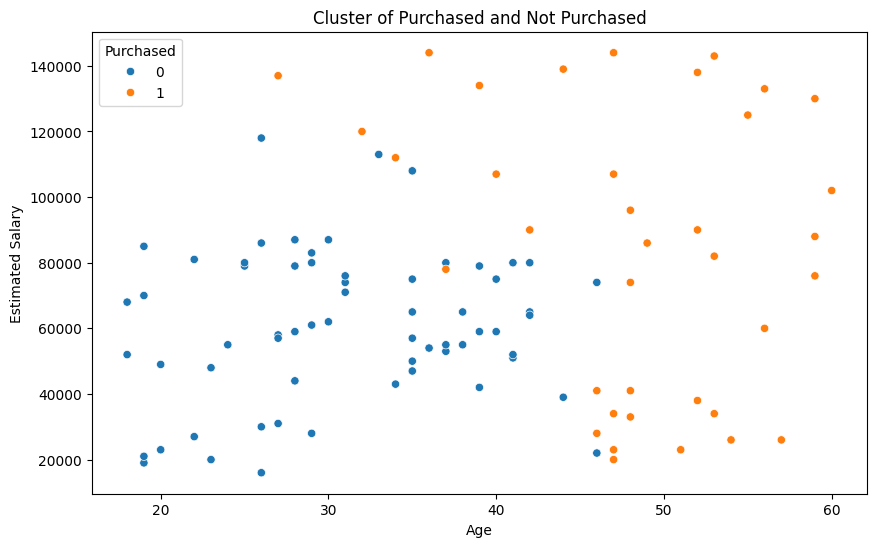

In [38]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test_df, x='Age', y='EstimatedSalary', hue='Purchased')

# Add titles and labels
plt.title('Cluster of Purchased and Not Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased', loc='upper left')

plt.show()